In [1]:
import praw
import pandas as pd
import datetime as dt
from IPython import display
import math
from pprint import pprint
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
reddit = praw.Reddit(client_id='jgrP89BE9hlOpA', \
                     client_secret='PQwrREBiVDW-CSLhq6IBAqeXfn0', \
                     user_agent='PortlandCrime / Domestic Violence and Child Welfare in Portland, ME', \
                     username='GBarboza-336', \
                     password='aJhisde1')
headlines = set()

In [3]:
#subreddit = reddit.subreddit('CPTSD')
subreddit = reddit.subreddit('socialwork')
for submission in reddit.subreddit('socialwork').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

973


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    cw_score = sia.polarity_scores(line)
    cw_score['headline'] = line
    results.append(cw_score)

pprint(results[:6], width=100)

[{'compound': 0.0,
  'headline': 'Another title for student/intern?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Role boundaries. Coworker overstepping?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.3182,
  'headline': 'Online courses for conflict resolution at the social worker level? Including '
              'dealing with mentally disabled people.',
  'neg': 0.133,
  'neu': 0.867,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'Child welfare', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.5106,
  'headline': 'What to do about an unprofessional clinical supervisor?',
  'neg': 0.32,
  'neu': 0.68,
  'pos': 0.0},
 {'compound': 0.4019,
  'headline': 'Are you attending conferences this year? If yes which ones.',
  'neg': 0.0,
  'neu': 0.769,
  'pos': 0.231}]


C:\Users\g.barboza\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Another title for student/intern?,0.000,1.000,0.0
1,0.0000,Role boundaries. Coworker overstepping?,0.000,1.000,0.0
2,-0.3182,Online courses for conflict resolution at the ...,0.133,0.867,0.0
3,0.0000,Child welfare,0.000,1.000,0.0
4,-0.5106,What to do about an unprofessional clinical su...,0.320,0.680,0.0


In [6]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Another title for student/intern?,0.000,1.000,0.0,0
1,0.0000,Role boundaries. Coworker overstepping?,0.000,1.000,0.0,0
2,-0.3182,Online courses for conflict resolution at the ...,0.133,0.867,0.0,-1
3,0.0000,Child welfare,0.000,1.000,0.0,0
4,-0.5106,What to do about an unprofessional clinical su...,0.320,0.680,0.0,-1


In [7]:
df2 = df[['headline', 'label']]
df2.to_csv('CPTSD_headlines_labels1.csv', mode='a', encoding='utf-8', index=False)
df2.head()

,headline,label
0,Another title for student/intern?,0
1,Role boundaries. Coworker overstepping?,0
2,Online courses for conflict resolution at the ...,-1
3,Child welfare,0
4,What to do about an unprofessional clinical su...,-1


In [8]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Are you attending conferences this year? If yes which ones.',
 '[FAQ] What is the best way to prepare for the licensing exam?',
 'Truth.',
 'Best way to make a formal complaint against a protemp judge?',
 'Social worker quietly left 11 million to children’s charities']

Negative headlines:

['Online courses for conflict resolution at the social worker level? Including dealing with mentally disabled people.',
 'What to do about an unprofessional clinical supervisor?',
 'Problem with seeking therapy as a therapist',
 'How do I deal with CRUEL feedback at work?',
 'Fee for service wage violations?']


In [9]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    573
 1    225
-1    175
Name: label, dtype: int64
 0    58.890031
 1    23.124358
-1    17.985612
Name: label, dtype: float64


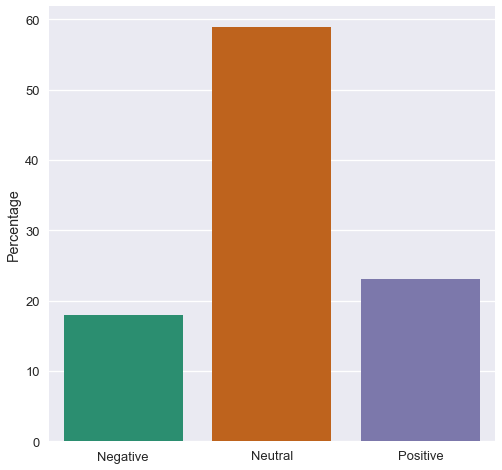

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [11]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [12]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [13]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [14]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [15]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('social', 52),
 ('work', 32),
 ('like', 21),
 ('job', 17),
 ('workers', 17),
 ('worker', 15),
 ('help', 15),
 ('best', 13),
 ('care', 11),
 ('would', 10),
 ('good', 9),
 ('share', 9),
 ('week', 8),
 ('please', 8),
 ('career', 8),
 ('support', 8),
 ('advice', 8),
 ('clients', 8),
 ('life', 7),
 ('love', 7)]

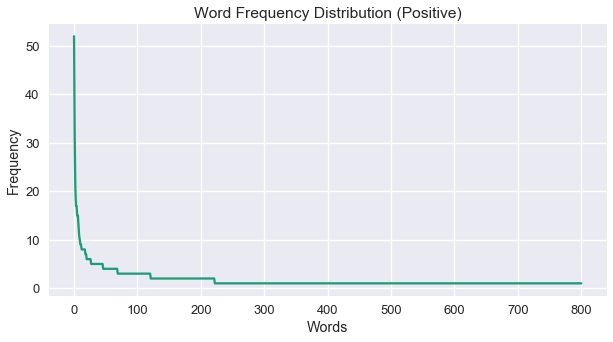

In [16]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

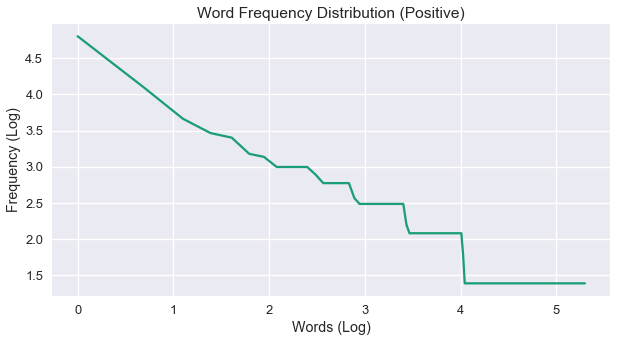

In [17]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [18]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('social', 33),
 ('work', 28),
 ('worker', 16),
 ('crisis', 11),
 ('job', 8),
 ('client', 8),
 ('new', 7),
 ('mental', 6),
 ('stress', 5),
 ('clients', 5),
 ('loss', 5),
 ('struggling', 5),
 ('workers', 5),
 ('grief', 5),
 ('feel', 5),
 ('today', 5),
 ('advice', 5),
 ('want', 5),
 ('program', 5),
 ('frustrated', 5)]

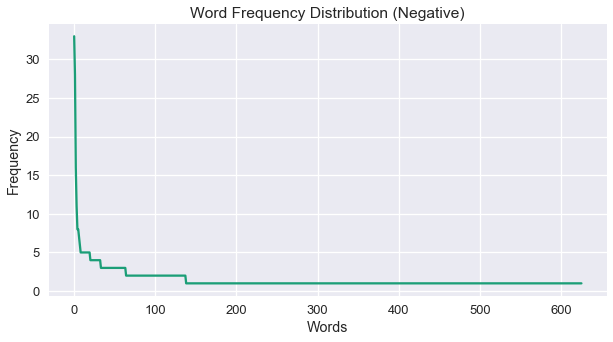

In [19]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

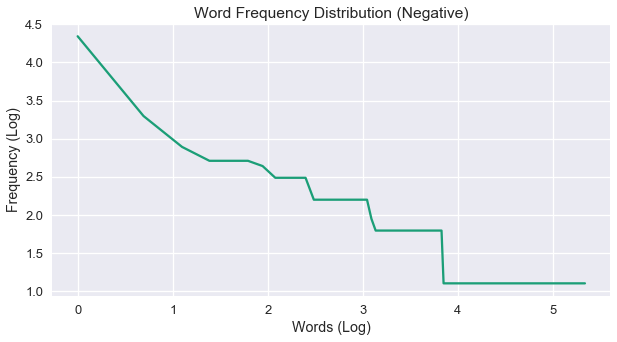

In [20]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [22]:
df = pd.read_csv('C:/Users/g.barboza/CPTSD_headlines_labels1.csv', encoding='utf-8')
df.head()

,headline,label
0,I’m touched that people are paying efforts to ...,-1
1,How exactly does wraparound work?,0
2,Be honest: The Nightmare of Productivity,1
3,Just passed my LMSW exam!,0
4,Advice/Boundaries,0


In [23]:
df = df[df.label != 0]
df.label.value_counts()

0        3708
1        1597
-1       1541
label       6
Name: label, dtype: int64

In [24]:
top_subreddit = subreddit.top()

In [25]:
hot_subreddit = subreddit.hot(limit=1000)

In [26]:
top_subreddit = subreddit.top(limit=1000)

In [27]:
for submission in subreddit.top(limit=10):
    print(submission.title, submission.id)

Choosing a therapist... 9szkw7
I have never seen something I relate so deeply with in my life 8onvmc
Most accurate thing I've seen 82t62g
Makes sense 8mztyf
I'm tired. 9xysvg
When a client calls at 4:55 on a Friday. 9vvw4u
surprised pikachu meme, counseling edition a839ta
I graduated today with my MSW. Do you guys like my cap? 8j8qnt
Avoiding inappropriate self disclosure with a client a5t46j
Happy Thanksgiving ! 9ze47q


In [28]:
for submission in subreddit.hot(limit=10):
    print(submission.title, submission.id)

Weekly School of Social Work/New to Social Work Questions afgxhv
Counseling Teenagers in a nutshell ag9aox
Watching self-determination in action and feeling frustrated ag9bcd
Tips for keeping a high case load organized? ag3ub3
Having a tough time ag8w9l
Has anyone ever used or heard of someone using their social work qualifications to emigrate? ag9xwi
Something I need to say about the exam... ag9dam
What modalities are you most familiar with? ag4oii
How to handle all the barriers that come with trying to help clients? afyavf
"Don't take it Personally" afyicy


In [29]:
topics_dict = { "title":[], "score":[], "id":[], "url":[], "comms_num": [], "created": [], "body":[]}

In [30]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [ ]:
topics_data = pd.DataFrame(topics_dict)
topics_data.drop_duplicates(subset=['id'], inplace=True)
topics_data

In [ ]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [ ]:
_timestamp = topics_data["created"].apply(get_date)

In [ ]:
topics_data = topics_data.assign(timestamp = _timestamp)

In [ ]:
topics_data.to_csv('FILENAME.csv') 